In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz 
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import tensorflow as tf

#About Dataset

In [ ]:
data = pd.read_csv("/content/diabetes_data.csv", sep = ';')

In [ ]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [ ]:
data.shape

(520, 17)

In [ ]:
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:
numeric = data.select_dtypes(["int", "float"]).columns
for num_col in numeric: 
    print(f"{num_col} : {data[num_col].nunique()} unique values(s)")

age : 51 unique values(s)
polyuria : 2 unique values(s)
polydipsia : 2 unique values(s)
sudden_weight_loss : 2 unique values(s)
weakness : 2 unique values(s)
polyphagia : 2 unique values(s)
genital_thrush : 2 unique values(s)
visual_blurring : 2 unique values(s)
itching : 2 unique values(s)
irritability : 2 unique values(s)
delayed_healing : 2 unique values(s)
partial_paresis : 2 unique values(s)
muscle_stiffness : 2 unique values(s)
alopecia : 2 unique values(s)
obesity : 2 unique values(s)
class : 2 unique values(s)


In [ ]:
# Encoding
label_encoder = LabelEncoder() 
data['gender'] = label_encoder.fit_transform(data['gender'])

data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#EDA

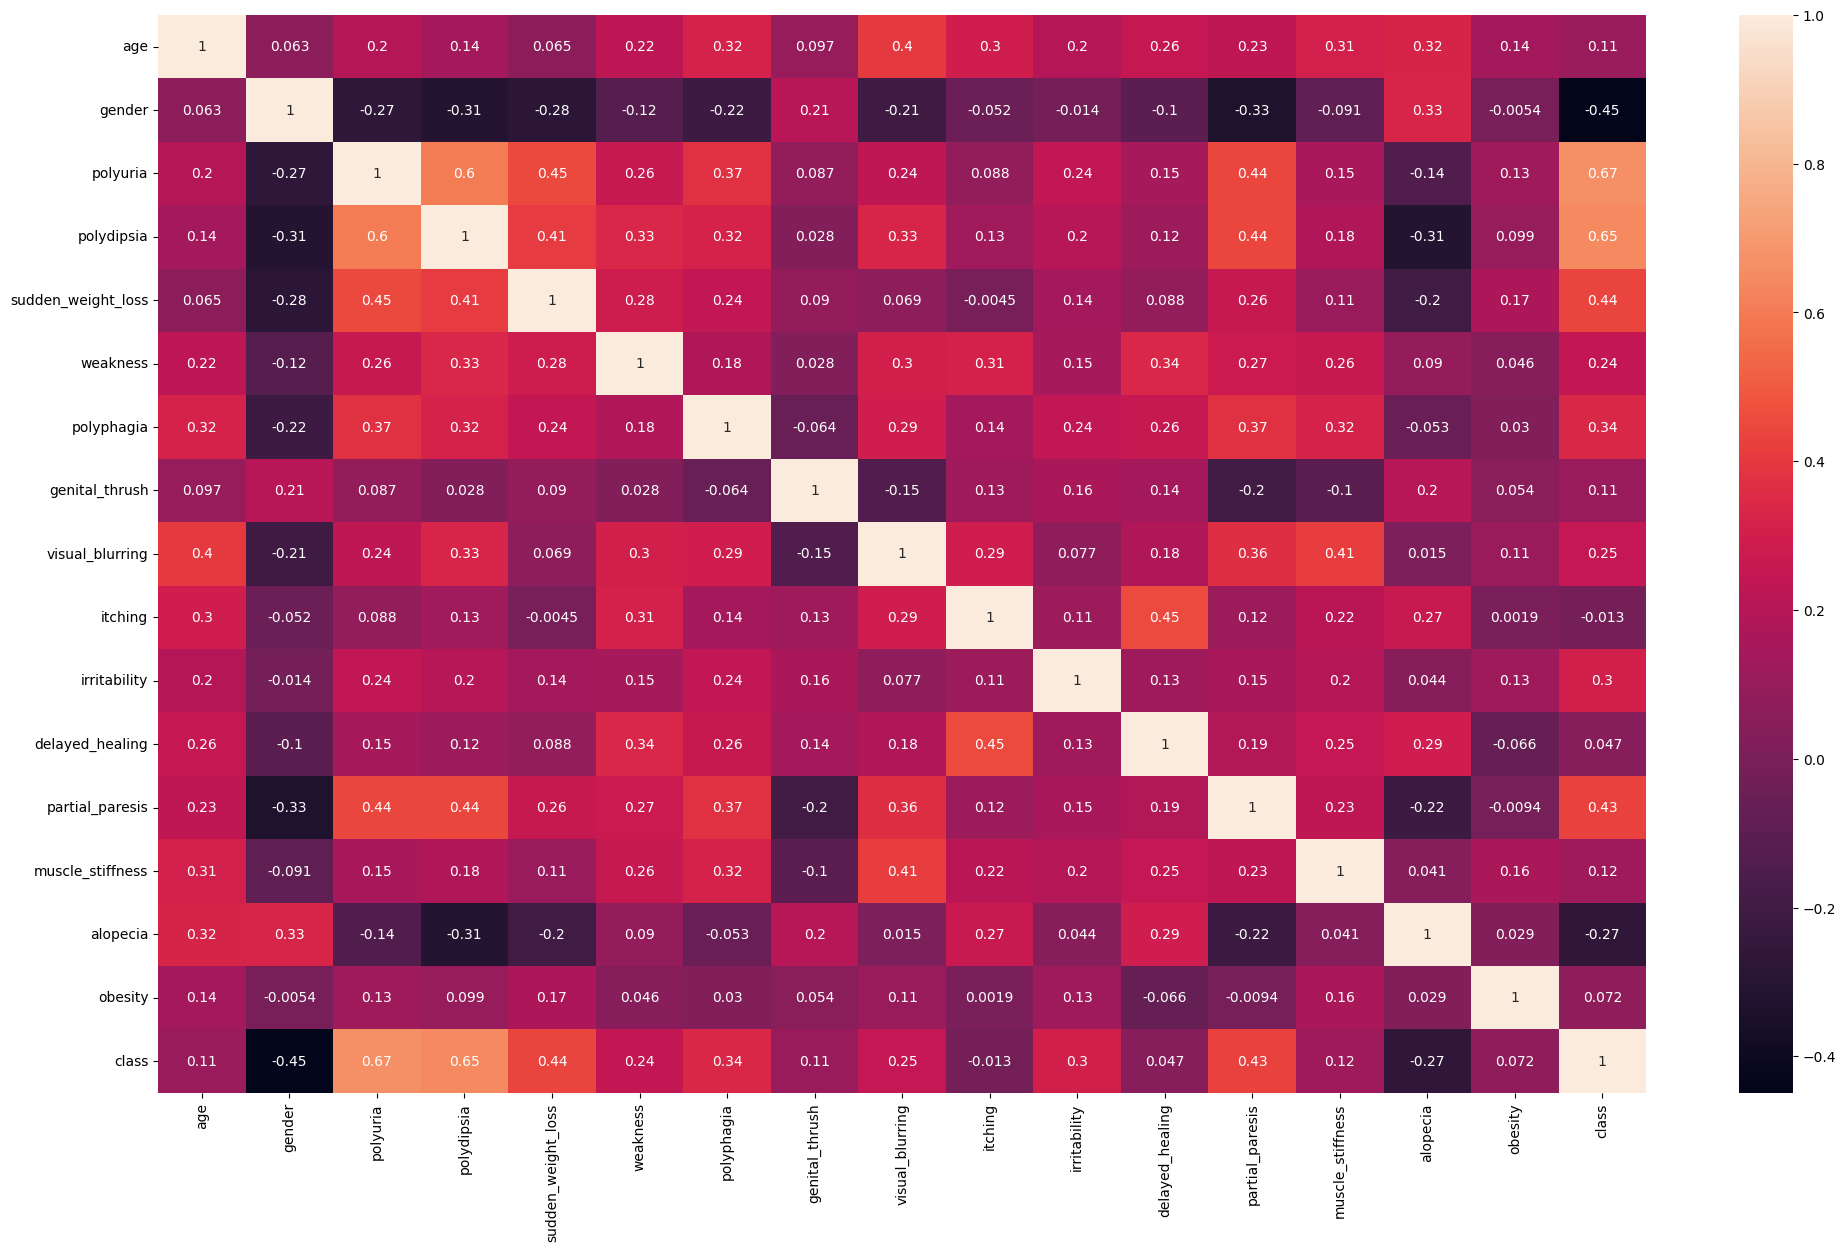

In [ ]:
# let's make a correlation matrix
plt.figure(figsize=(24, 14))
sns.heatmap(data.corr(), annot=True);

Text(0.5, 1.0, 'Distribution : Age')

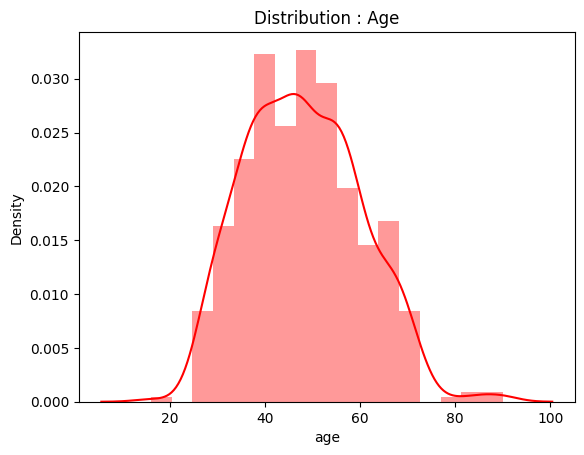

In [ ]:
sns.distplot(data['age'], color = 'red')
title = 'Distribution : Age'
plt.title(title)

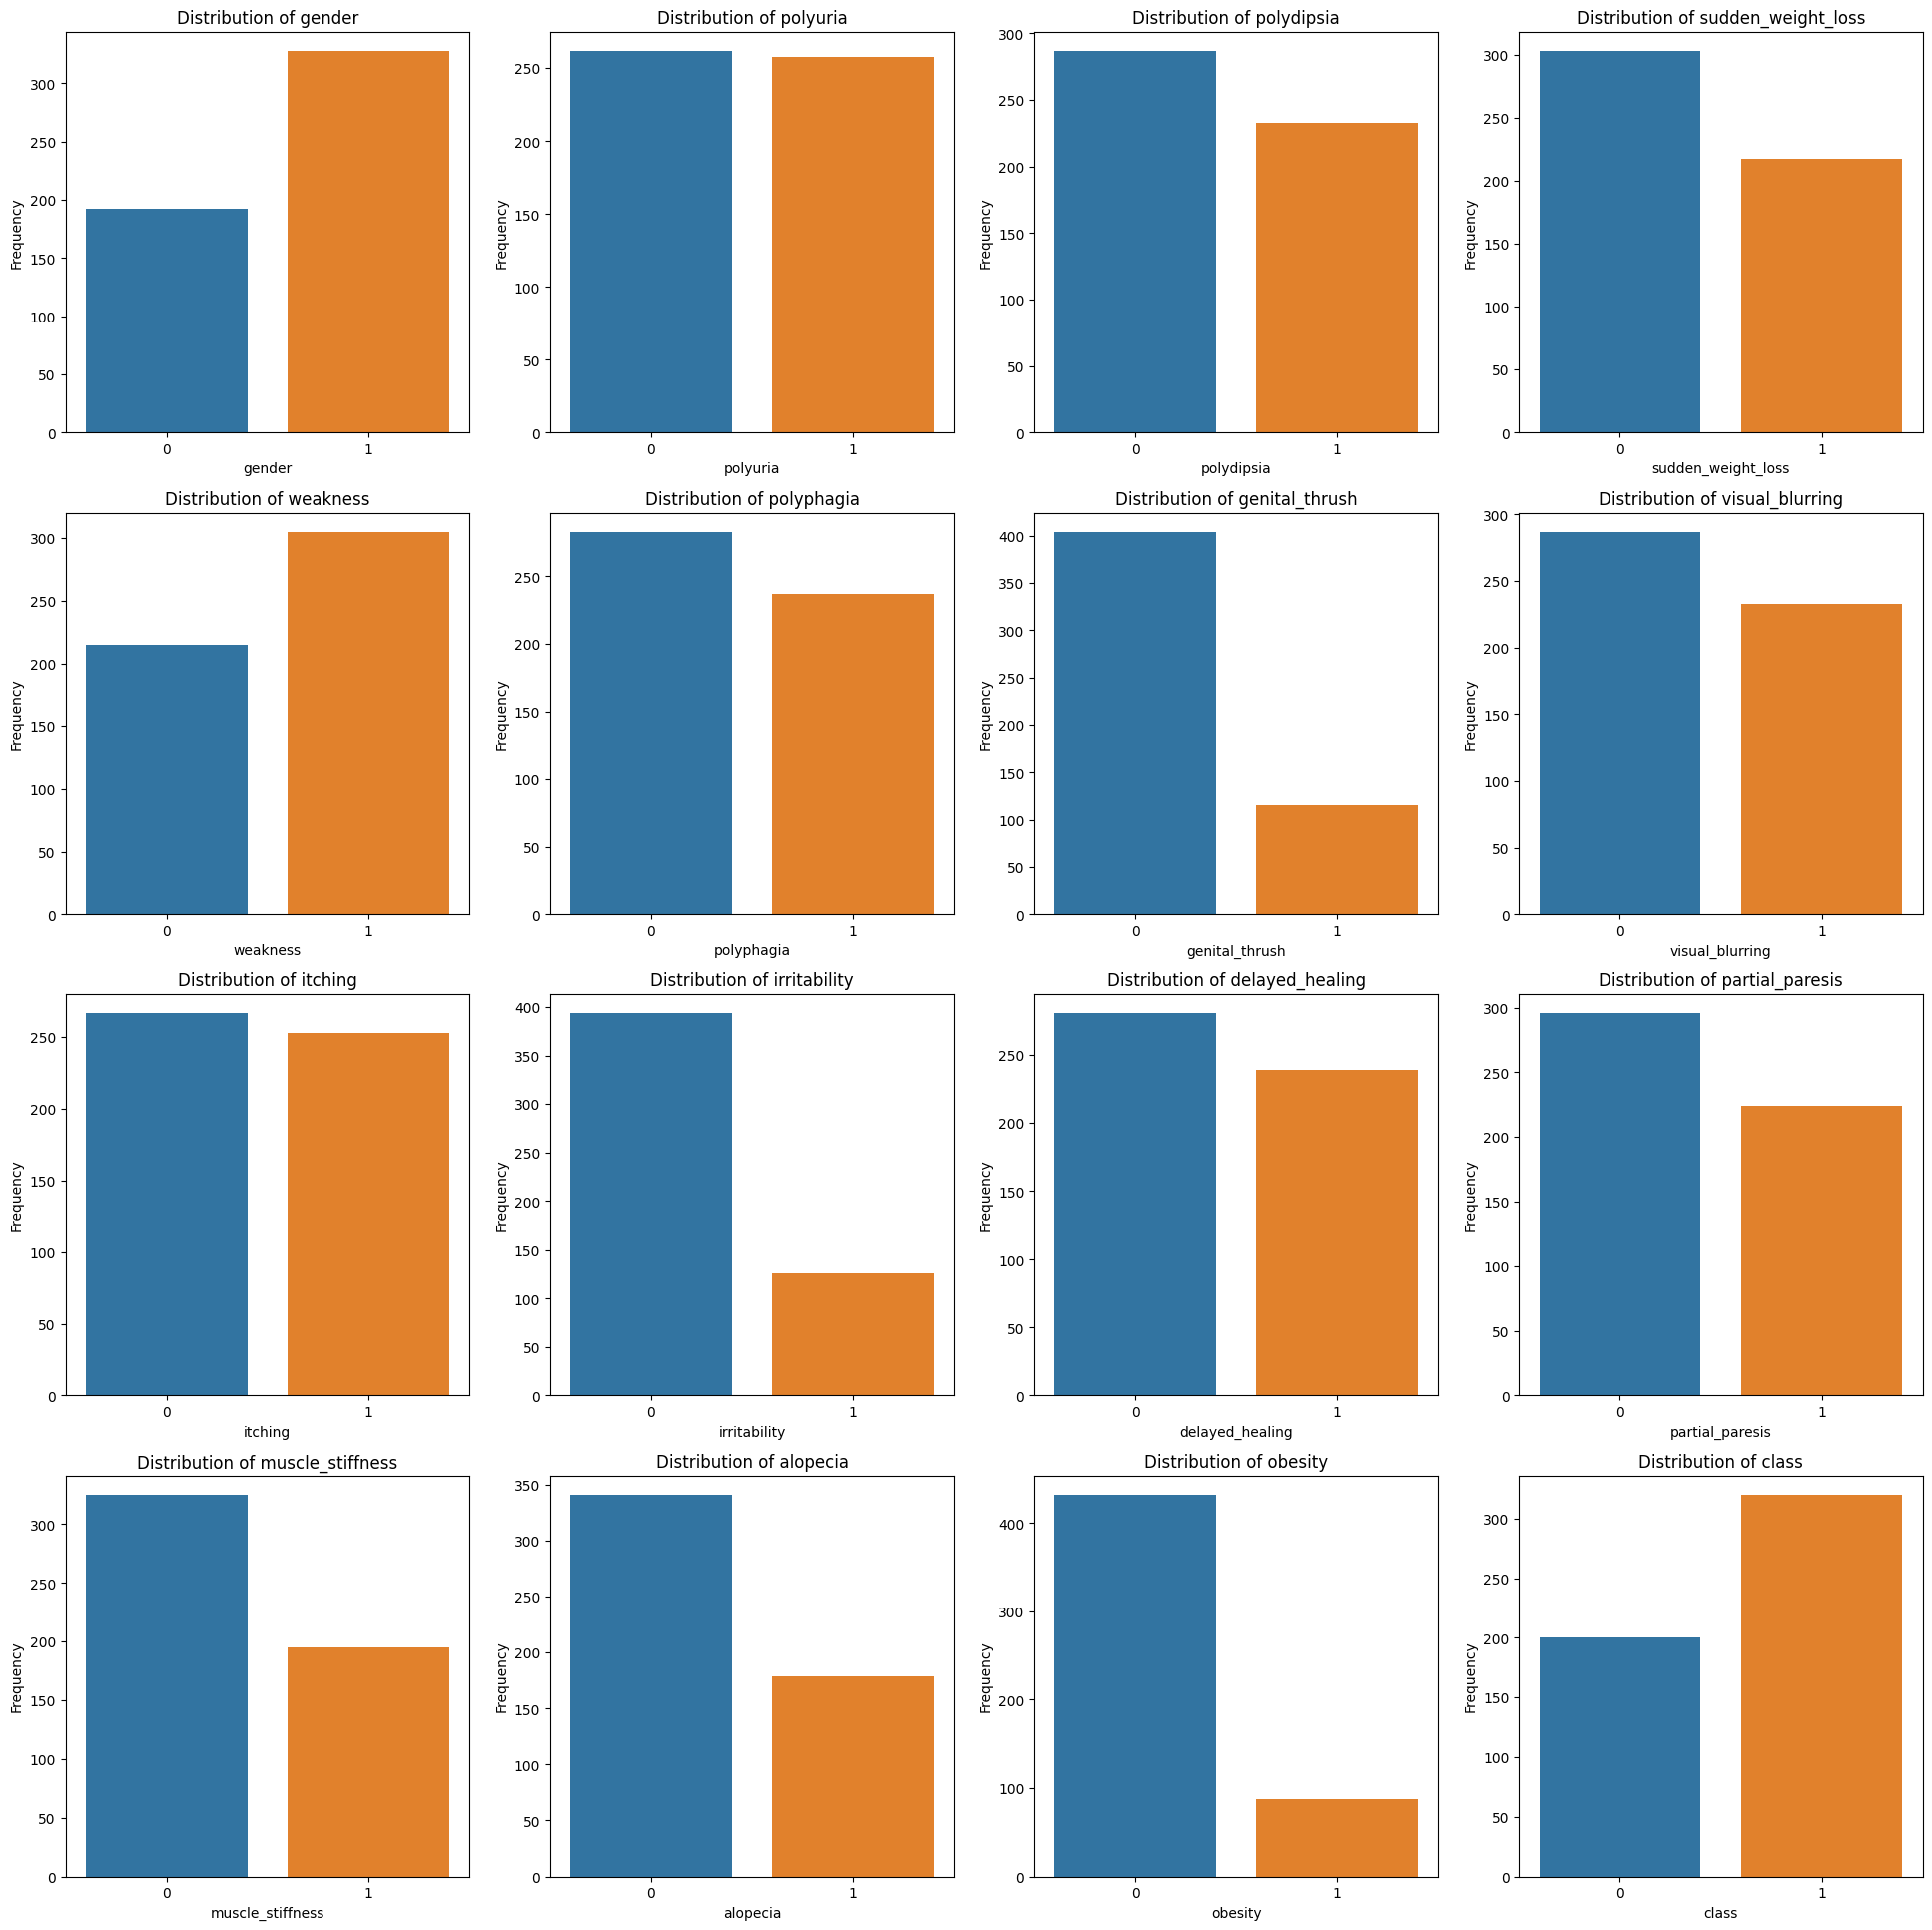

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 4,figsize = (24,24))
i=0
for col in data.columns[1:]:

  plt.subplot(4,4,i+1)
  i=i+1
  counts = data[col].value_counts()
  sns.barplot(x=counts.index, y=counts.values)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.show()

#Pre-Processing

In [ ]:
X = data.drop(['class'], axis='columns')
y = data['class']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print('\n')
print(X_test.shape)
print(y_test.shape)

(416, 16)
(416,)


(104, 16)
(104,)


In [ ]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

#Models

We will use Decision tree as our very first classification model and then will use SVM. After these ensemble learning will be used and after that we have used the Artificial neural networks

##Decision tree

In [ ]:

param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}


dt = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)


dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy: 0.9711538461538461


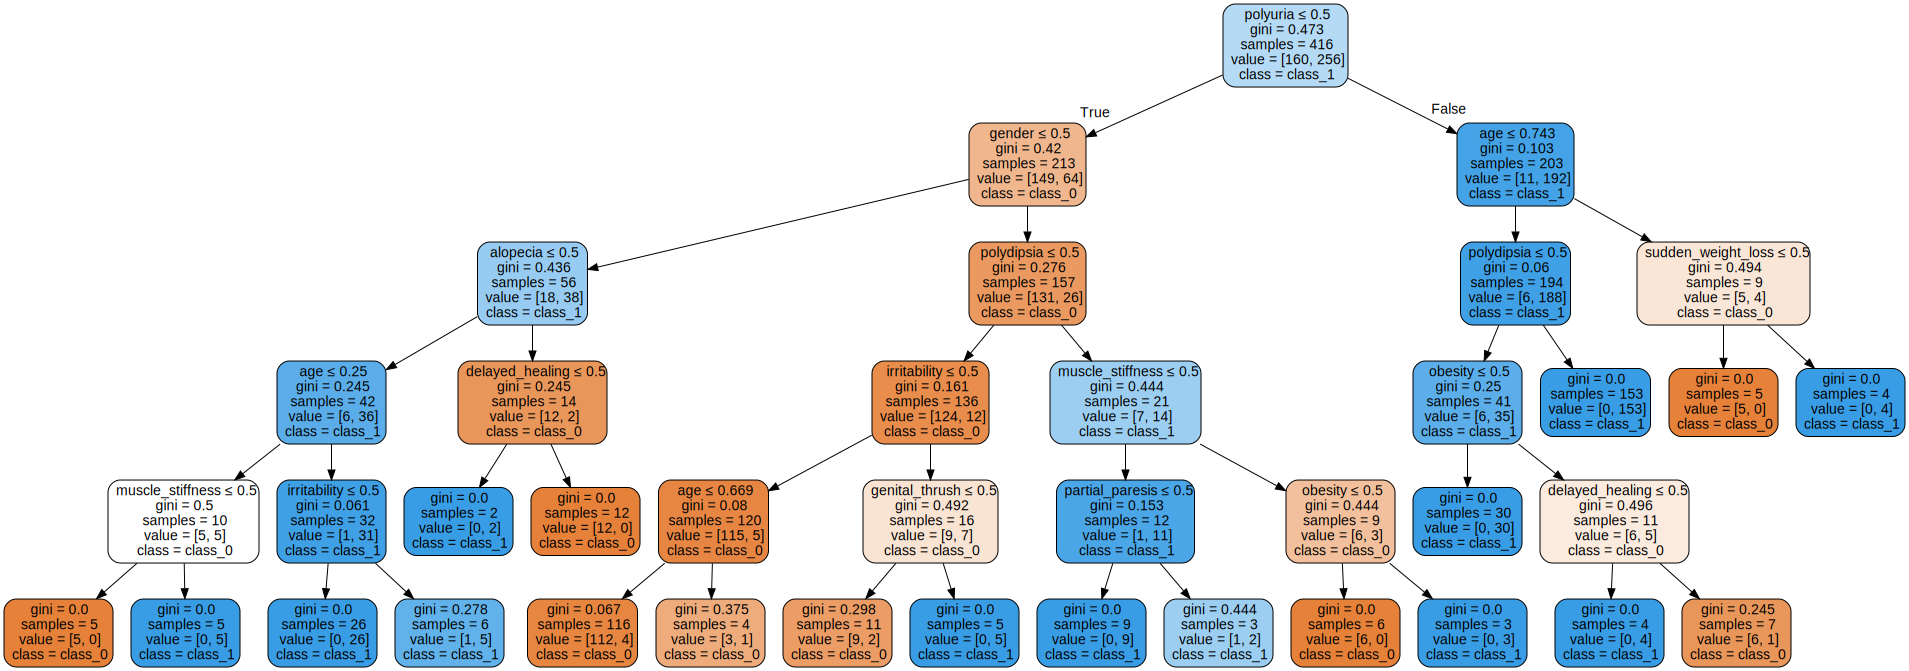

In [ ]:

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['class_0', 'class_1'], 
                           filled=True, rounded=True, 
                           special_characters=True) 


graph = graphviz.Source(dot_data) 
graph

K-Fold Cross Validation

In [ ]:
k = 5 # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


accuracies = []


for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

    dt.fit(X_train, y_train)
    
    
    y_pred = dt.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


mean_accuracy = np.mean(accuracies)
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.9576923076923076


##SVM

In [ ]:

param_grid_2 = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear']}


svc = svm.SVC(probability=True)


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid_2, cv=5)
grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)


cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

In [ ]:

support_vectors = grid_search.best_estimator_.support_vectors_

# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

##Ensemble Learning

In [ ]:

weak_model = DecisionTreeClassifier()


n_estimators_list = range(2, 10)


accuracy_list = []
for n_estimators in n_estimators_list:
    bagging_model = BaggingClassifier(base_estimator=weak_model, n_estimators=n_estimators, random_state=42)
    bagging_model.fit(X_train, y_train)
    score = bagging_model.score(X_test, y_test)
    accuracy_list.append(score)


plt.plot(n_estimators_list, accuracy_list, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Bagging Classifier Accuracy with DecisionTree')
plt.show()

`for 4 overfitting`

In [ ]:

weak_model = DecisionTreeClassifier()


best_bagging_model = BaggingClassifier(base_estimator=weak_model, n_estimators=6, random_state=42)


best_bagging_model.fit(X_train, y_train)

score = best_bagging_model.score(X_test, y_test)

print("Accuracy:", score)

##ANN

In [ ]:
tf.random.set_seed(42)
input_shape = [X_train.shape[1]]

def model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=input_shape, name="input_1"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(128, activation="relu", name="input_2"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
    ], name="our_model")

    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    return model

model = model()


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1,
)

Epoch 1/100
13/13 [==============================] - 2s 18ms/step - loss: 1.7805 - accuracy: 0.5264 - val_loss: 0.8112 - val_accuracy: 0.6154
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 1.3424 - accuracy: 0.5144 - val_loss: 0.6963 - val_accuracy: 0.6154
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 1.2563 - accuracy: 0.5264 - val_loss: 0.6060 - val_accuracy: 0.6154
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 0.9244 - accuracy: 0.5721 - val_loss: 0.5943 - val_accuracy: 0.6154
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 0.9100 - accuracy: 0.5385 - val_loss: 0.6193 - val_accuracy: 0.6154
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 0.7916 - accuracy: 0.6034 - val_loss: 0.5613 - val_accuracy: 0.6154
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.7512 - accuracy: 0.6010 - val_loss: 0.5506 - val_accuracy: 0.6154
Epoch 

In [ ]:
model.summary()

Model: "our_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (Dense)             (None, 128)               2176      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 input_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________


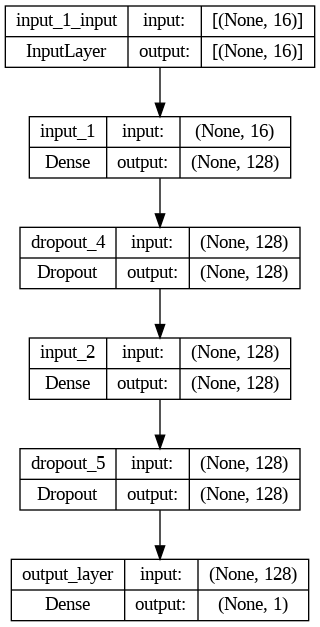

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

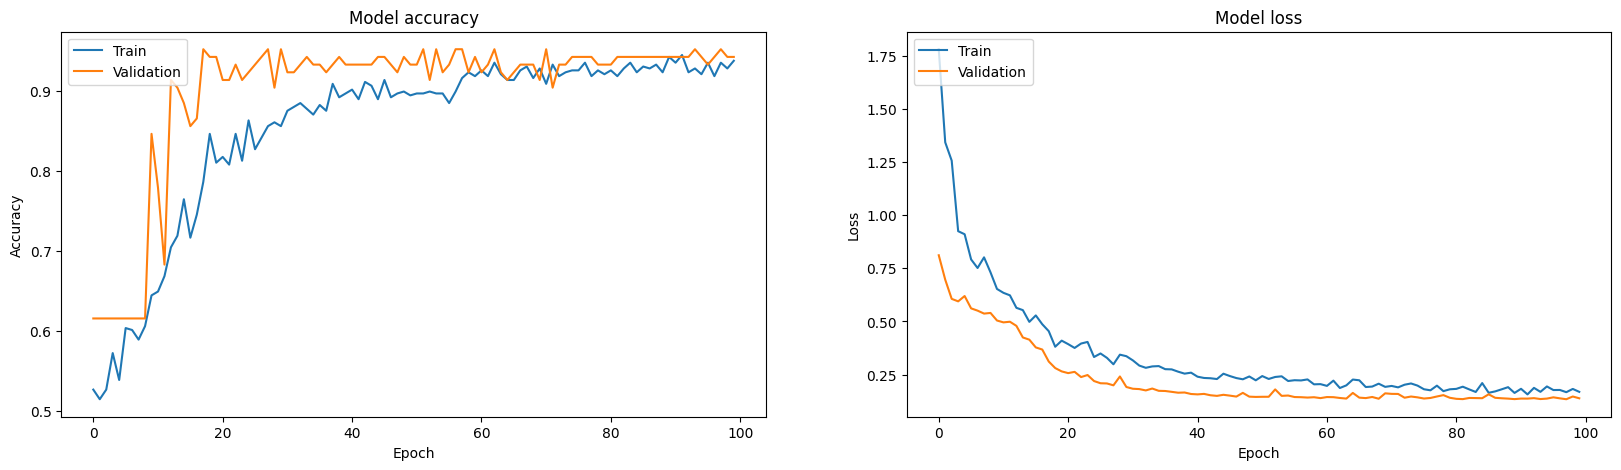

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
# Ploted training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2,2)
# Plotted training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"y_pred: {y_pred[0]}")
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

4/4 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9808
y_pred: [0.9690541]
Model loss on the test set: 0.08345404267311096
Model accuracy on the test set: 98.08%


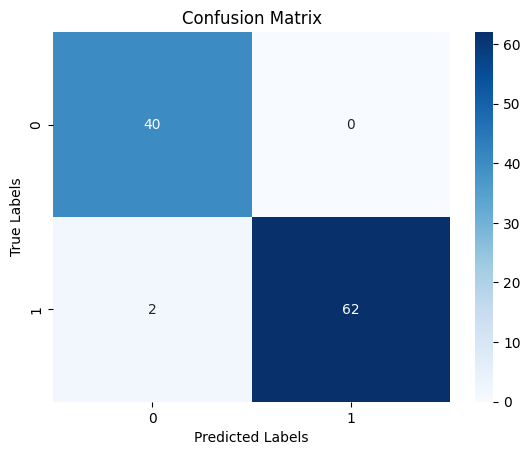

In [ ]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()